In [39]:
import numpy as np
from scipy import optimize as opt
from matplotlib import pyplot as plt

**PROBLEM 1**

In [76]:
def newton(f, x_guess, fprime, tol=1e-5, iter_max=15):
    
    convergence = False
    x = x_guess
    for iter in range(1, iter_max+1):
        x1 = x - f(x) / fprime(x)
        error = np.abs(x1 - x)
        if error < tol:
            convergence = True
            break

        x = x1
            
    return x, convergence, iter

In [77]:
def f1(x):
    return np.exp(x) - 2
def f1_prime(x):
    return np.exp(x)

In [78]:
print(newton(f1, 0, f1_prime))
print(opt.newton(f1, 0, f1_prime))

(0.6931475810597714, True, 5)
0.6931471805599453


In [79]:
def f2(x):
    return x ** 4 - 3
def f2_prime(x):
    return 4 * x ** 3

In [80]:
print(newton(f2, 1, f2_prime))
print(opt.newton(f2, 1, f2_prime))

(1.3160753007540056, True, 5)
1.3160740129524924


**PROBLEM 3**

In [81]:
def newton_back(f, x_guess, fprime, tol=1e-5, iter_max=15, alpha=1):
    
    convergence = False
    x = x_guess
    for iter in range(1, iter_max+1):
        x1 = x - alpha * f(x) / fprime(x)
        error = np.abs(x1 - x)
        if error < tol:
            convergence = True
            break

        x = x1
            
    return x, convergence, iter

In [82]:
f1 = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f1_prime = lambda x: (1./3) * np.power(np.abs(x), -2./3)

In [83]:
print(newton_back(f1, 0.01, f1_prime))

(-327.6800000000003, False, 15)


In [84]:
print(newton_back(f1, 0.01, f1_prime, alpha=0.4))

(-3.2000000000000507e-06, True, 6)


**PROBLEM 4**

In [102]:
def newton_back2(f, x_guess, fprime, tol=1e-5, iter_max=15):
    
    alpha = np.linspace(.01, 1, 100)
    a_list = np.zeros(len(alpha))
    runs = np.zeros(len(alpha))
    
    for idx, alfa in enumerate(alpha):
        x = x_guess        
        for iter in range(1, iter_max+1):
            x1 = x - alfa * f(x) / fprime(x)
            error = np.abs(x1 - x)
            if error < tol:
                break

            x = x1   
        runs[idx] = iter
        
    output = {}
    output['runs'] = runs
    output['alpha'] = alpha
        
    return output

In [103]:
f1 = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f1_prime = lambda x: (1./3) * np.power(np.abs(x), -2./3)

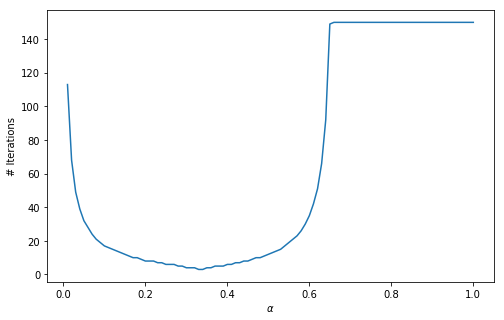

In [104]:
out = newton_back2(f1, .01, f1_prime, iter_max=150)

fig = plt.figure(figsize=(8,5))
plt.plot(out['alpha'], out['runs'])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'# Iterations')
plt.show()

**PROBLEM 7**

In [105]:
def basis_newton(f, fprime, zeros, bounds, res, iters):

    x_real = np.linspace(bounds[0], bounds[1], res)
    x_imag = np.linspace(bounds[2], bounds[3], res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    
    Xk = np.zeros((res,res), dtype=np.float64)
    for ii in range(iters):
        X_1 = X_0 - f(X_0)/fprime(X_0)
        X_0 = X_1
    
    Y = np.fromiter((np.argmin(abs(zeros - i)) for i in X_1.ravel()), dtype=np.int64, count=res**2).reshape((res, res))

    fig = plt.figure(figsize=(10,7))
    plt.pcolormesh(x_real, x_imag, Y, cmap="brg") 

In [106]:
f3 = lambda x: x**3 - 1
f3_prime = lambda x: 3*x**2

In [107]:
zeros = np.array([1, -.5 + 1j * np.sqrt(3) / 2, -.5 - 1j * np.sqrt(3) / 2])
bounds = np.array([-1.5, 1.5, -1.5, 1.5])

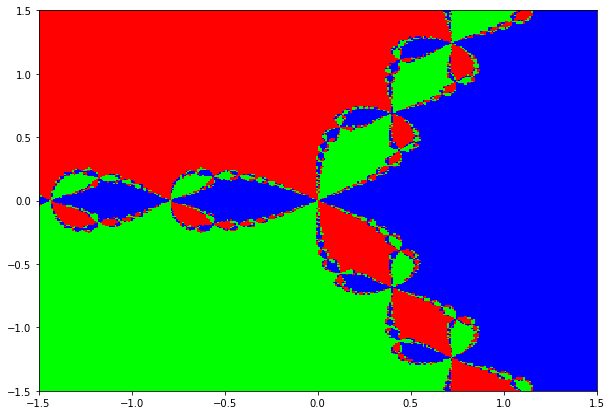

In [110]:
basis_newton(f3, f3_prime, zeros, bounds, 300, 100)

In [112]:
f4 = lambda x: x**3 - x
f4_prime = lambda x: 3*x**2 - 1

In [113]:
zeros = np.array([0, 1, -1])

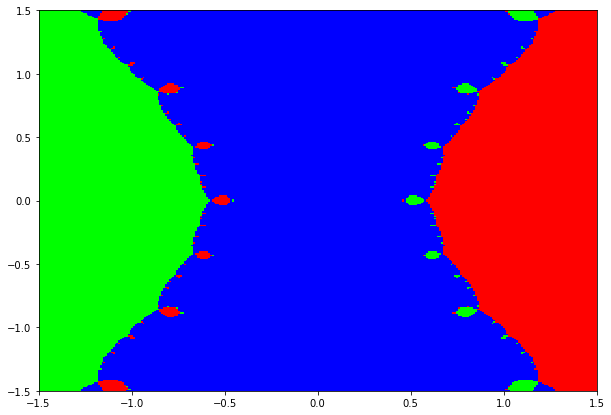

In [114]:
basis_newton(f4, f4_prime, zeros, bounds, 300, 100)